In [2]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
import pylab as pl
import scipy.stats as sstats

# setting parameters for default matplotlib plots
%matplotlib inline

In [3]:
pl.style.use('fabiostyle')
# needs to find the library of functions
sys.path.append('../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [4]:
# NOTEBOOK_NAME = NOTEBOOK_NAME.split('/')[-1][:-6]
NOTEBOOK_NAME = 'decoding_vs_baseline_FIGURES'

In [5]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

Unable to restore variable 'add_significance', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'load_all_animals_vars', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'sig_vs_chance', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)


In [63]:
#this will cause text to be exported as 'true text' which can be edited in Adobe Illustrator
pl.rcParams['pdf.fonttype']=42
pl.rcParams['ps.fonttype']=42

In [6]:
from itertools import product
def load_all_animals_vars(varname, animal_list, pilot_list=None, notebook='preprocessing'):
    all_of_them = {}
    for ani in animal_list:
        folder = '../%s/notebooks/autorestore/%s/' % (ani, notebook)
        all_of_them.update({ani: ut.load_variable(varname, folder)})
    return all_of_them

In [65]:
def report_stats (array1, array2, sig_func=None,mcc=1,loops=None):
    if sig_func is None:
        sig_func = lambda x, y: sstats.mannwhitneyu(x, y, alternative='two-sided')
        U = sig_func(array1, array2)[0]
        z = ((U-((loops*loops)/2))/(np.sqrt(((loops*loops)*(loops+loops+1))/12)))
        r = z/np.sqrt(loops*2)
        p = sig_func(array1, array2)[-1]
        print "U =",U,"p =",p*mcc,"r =",r
    if sig_func is 'ttest':
        sig_func = lambda x, y: sstats.ttest_ind(x, y)
        cohens_d = (np.mean(array1)-np.mean(array2))/np.sqrt((np.std(array1)**2+np.std(array2)**2)/2)
        p = sig_func(array1, array2)[-1]
        print sig_func(array1, array2),"d =", cohens_d, 'corrected p =',p*mcc

def report_stats_chance (array1, chance=0.5, sig_func=None,mcc=1):
    if sig_func is None:
        sig_func = lambda x: sstats.wilcoxon(x)
        subtracted = [x-chance for x in array1]
        U = sig_func(subtracted)[0]
        z = ((U-((loops*loops)/2))/(np.sqrt(((loops*loops)*(loops+loops+1))/12)))
        r = z/np.sqrt(loops*2)
        print sig_func(subtracted),"r =",r
    elif sig_func is 'ttest':
        sig_func = lambda x, y: sstats.ttest_1samp(x,y)
        cohens_d = (np.mean(array1)-chance)/np.std(array1)
        print sig_func(array1,chance),"d =",cohens_d

In [66]:
sessions = 'expo', 'pre', 'post'

for reference:

delta_t0 = 1

t_start0 = -5  # sec

t_stop0 = 9  # sec

In [8]:
comparisons = ['CS1','CS2','CS3','CS4','CSP_averaged','CSM_averaged']
comp_labels = ['CS1+','CS2+','CS3-','CS4-','CS+ avg.','CS- avg.']
comp_colors = ['mediumorchid','deeppink','darkturquoise','mediumseagreen','m','c']
dark_co = ('forestgreen','darkcyan','firebrick')

In [9]:
v_name=[]
for t in range(14):
    for comp in comparisons:
        for r in 'dhpc','vhpc':
            exec("baseline_scores_tb_%s_%s_%s = {}"%(t,comp,r))
            for sess in sessions:
                exec("v_name = 'baseline_scores_tb_%s_%s'"%(t,comp))
                if r == 'dhpc':
                    exec("path='../notebooks/autorestore/decoding_vs_baseline_%s_2wayOnly/'"%(r))
                if r == 'vhpc':
                    exec("path='../notebooks/autorestore/decoding_vs_baseline_%s/'"%(r))
                exec("baseline_scores_tb_%s_%s_%s_t = ut.load_variable(v_name,path)"%(t,comp,r))
                exec("baseline_scores_tb_%s_%s_%s_t = baseline_scores_tb_%s_%s_%s_t['%s']"%(t,comp,r,t,comp,r,sess))
                exec("baseline_scores_tb_%s_%s_%s['%s'] = baseline_scores_tb_%s_%s_%s_t"%(t,comp,r,sess,t,comp,r))

In [10]:
loops=10
for t in range (14):
    for comp in comparisons:
        exec("ttest_tb_%s_%s = {}"%(t,comp))
        exec("mannwhitU_tb_%s_%s = {}"%(t,comp))
        for sess in sessions:
            exec("ttest_tb_%s_%s[sess] = sstats.ttest_ind(baseline_scores_tb_%s_%s_dhpc[sess][:loops],baseline_scores_tb_%s_%s_vhpc[sess][:loops])"%(t,comp,t,comp,t,comp))
            exec("mannwhitU_tb_%s_%s[sess] = sstats.mannwhitneyu(baseline_scores_tb_%s_%s_dhpc[sess][:loops],baseline_scores_tb_%s_%s_vhpc[sess][:loops])"%(t,comp,t,comp,t,comp))

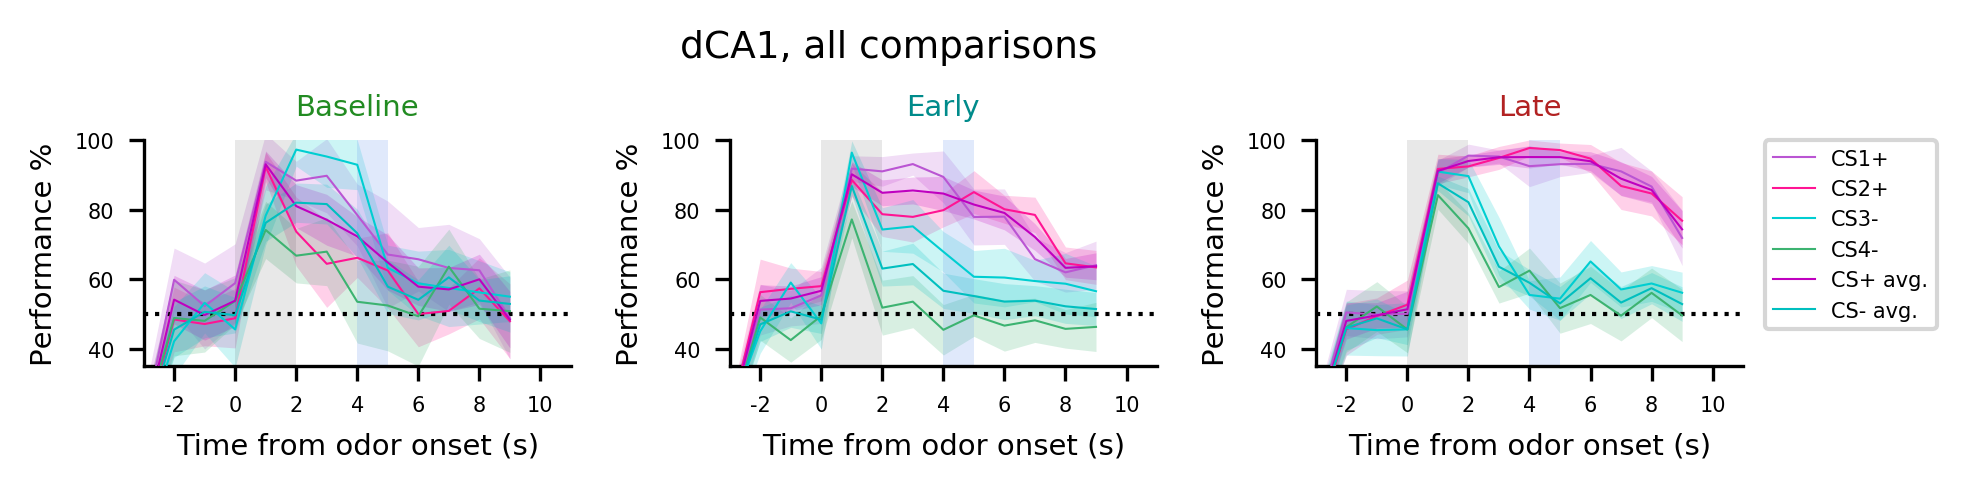

In [11]:
fig, ax = pl.subplots(1,3, figsize=(6, 1.5))

for comp,c,la in zip(comparisons,comp_colors,comp_labels):
    for r,sess in zip(range(3),sessions):
        ax[r].plot([(t-4) for t in range(14)], [(np.mean(eval("baseline_scores_tb_%s_%s_dhpc[sess]"%(t,comp)))*100) for t in range(14)],
                   color=c, ls='-',lw=.5, zorder=19 ,ms=1,label=la)
        m = np.array([(np.mean(eval("baseline_scores_tb_%s_%s_dhpc[sess]"%(t,comp)))*100) for t in range(14)])
        s = np.array([np.std(eval("baseline_scores_tb_%s_%s_dhpc[sess]"%(t,comp)))*100 for t in range(14)])
        ax[r].fill_between([(t-4) for t in range(14)],m-s,m+s,alpha=0.2,color=c,linewidth=0)
for x in range (3):
    ax[x].set_ylim(35, 100)
    ax[x].set_xlim(-3, 11)
    ax[x].set_xticks(np.arange(-2,11, 2))
    ax[x].set_xticklabels(np.arange(-2,11, 2))
    ax[x].hlines(50, -3,11, color='k', lw=1, linestyles='dotted')
    ax[x].set_xlabel('Time from odor onset (s)')
    ax[x].set_ylabel('Performance %')
    pt.plot_period_bar(ax[x], 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
    pt.plot_period_bar(ax[x], 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.2)
ax[0].set_title('Baseline', color=dark_co[0])
ax[1].set_title('Early', color = dark_co[1])
ax[2].set_title('Late', color = dark_co[2])
ax[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
pl.suptitle("dCA1, all comparisons", fontsize=9, y=1.05)

fig.tight_layout(pad=2)

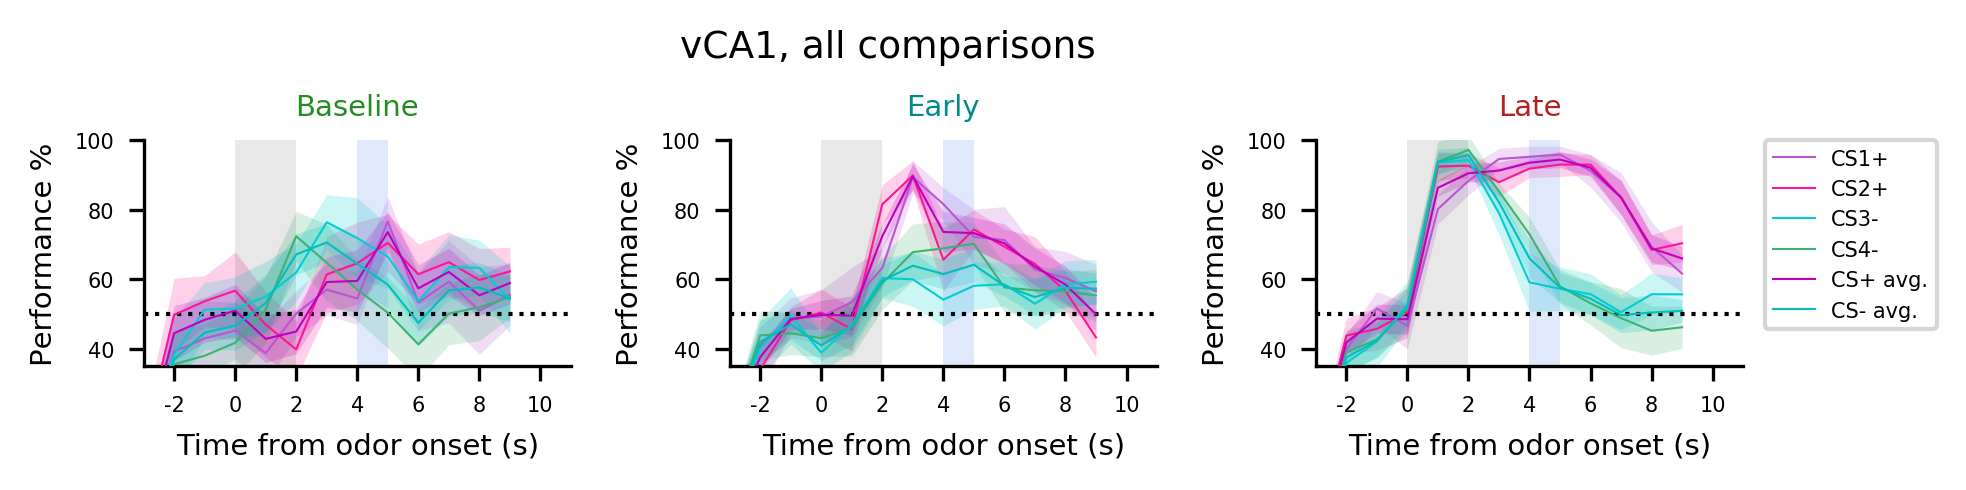

In [12]:
fig, ax = pl.subplots(1,3, figsize=(6, 1.5))

for comp,c,la in zip(comparisons,comp_colors,comp_labels):
    for r,sess in zip(range(3),sessions):
        ax[r].plot([(t-4) for t in range(14)], [(np.mean(eval("baseline_scores_tb_%s_%s_vhpc[sess]"%(t,comp)))*100) for t in range(14)],
                   color=c, ls='-',lw=.5, zorder=19 ,ms=1,label=la)
        m = np.array([(np.mean(eval("baseline_scores_tb_%s_%s_vhpc[sess]"%(t,comp)))*100) for t in range(14)])
        s = np.array([np.std(eval("baseline_scores_tb_%s_%s_vhpc[sess]"%(t,comp)))*100 for t in range(14)])
        ax[r].fill_between([(t-4) for t in range(14)],m-s,m+s,alpha=0.2,color=c,linewidth=0)
for x in range (3):
    ax[x].set_ylim(35, 100)
    ax[x].set_xlim(-3, 11)
    ax[x].set_xticks(np.arange(-2,11, 2))
    ax[x].set_xticklabels(np.arange(-2,11, 2))
    ax[x].hlines(50, -3,11, color='k', lw=1, linestyles='dotted')
    ax[x].set_xlabel('Time from odor onset (s)')
    ax[x].set_ylabel('Performance %')
    pt.plot_period_bar(ax[x], 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
    pt.plot_period_bar(ax[x], 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.2)
ax[0].set_title('Baseline', color=dark_co[0])
ax[1].set_title('Early', color = dark_co[1])
ax[2].set_title('Late', color = dark_co[2])
ax[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
pl.suptitle("vCA1, all comparisons", fontsize=9, y=1.05)

fig.tight_layout(pad=2)

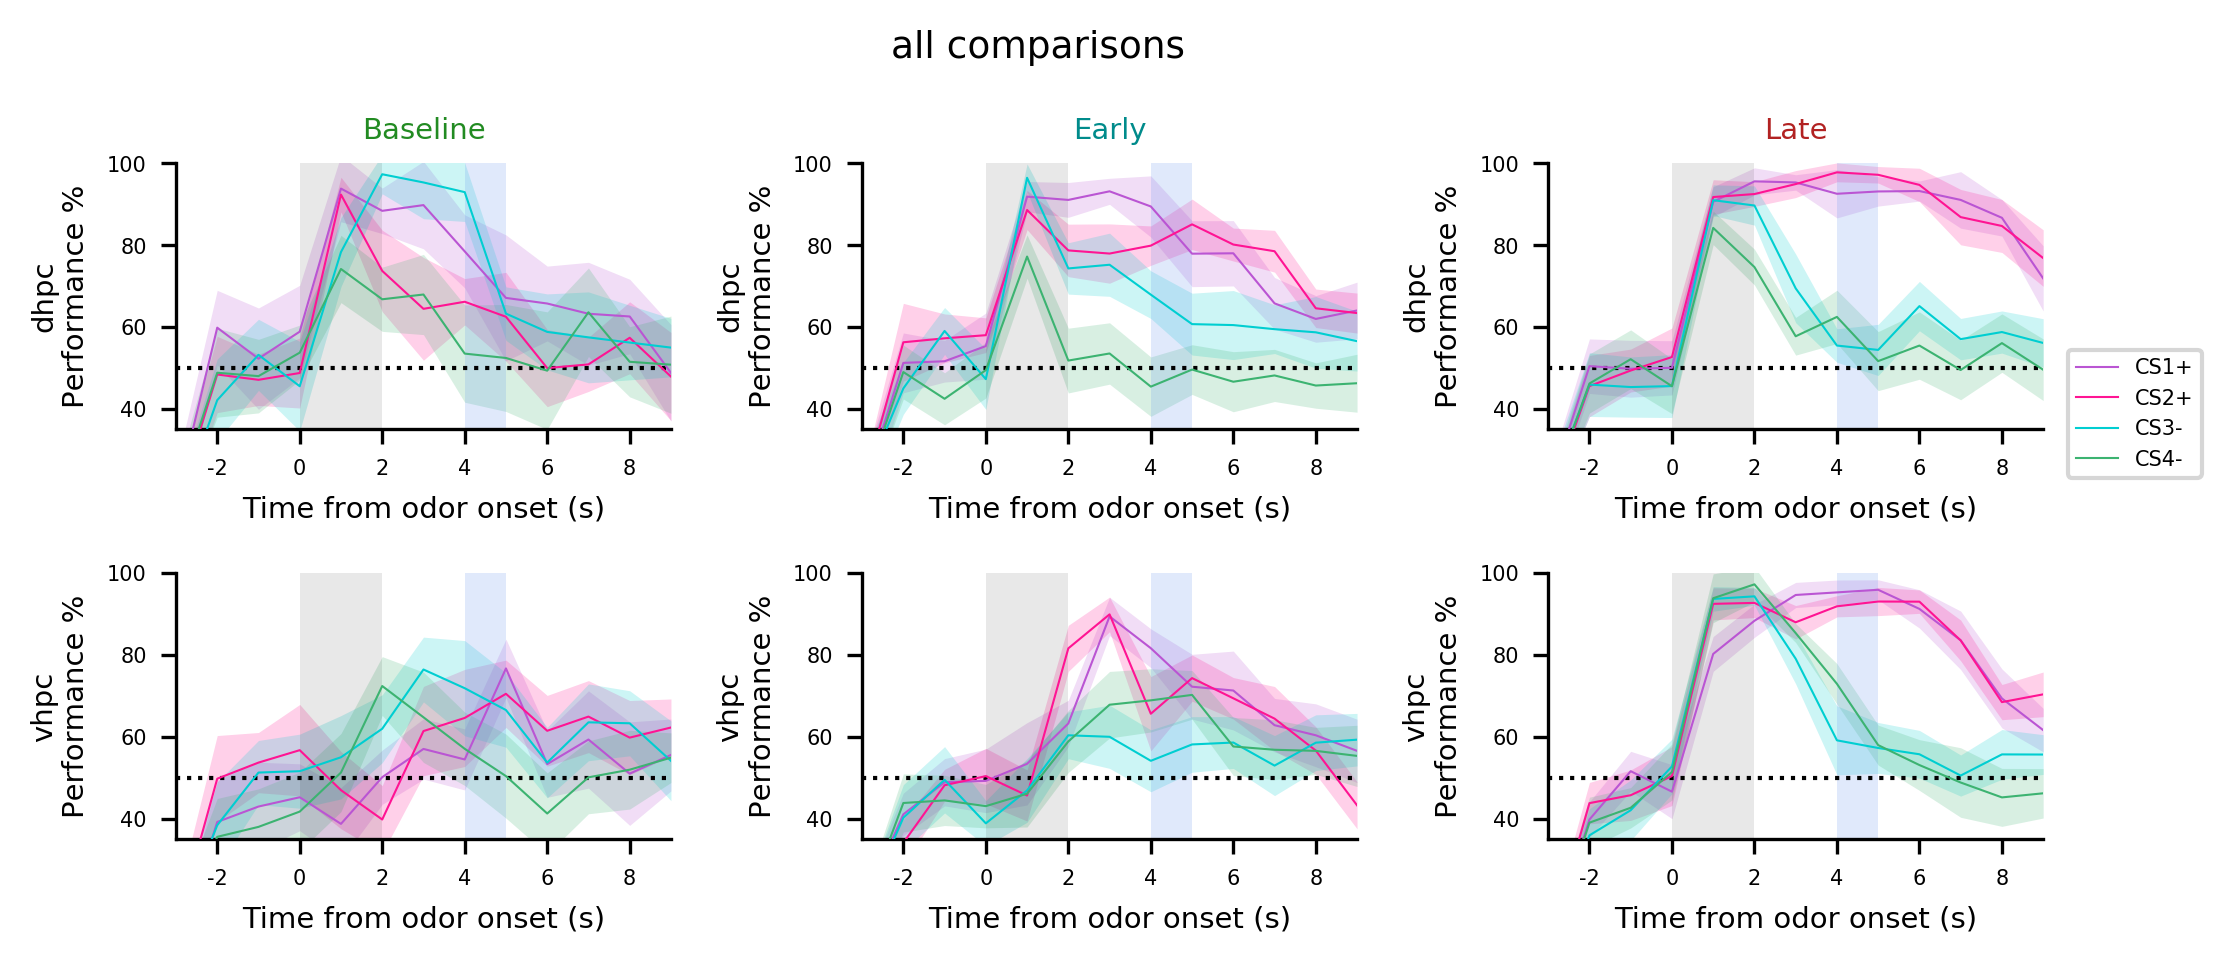

In [13]:
fig, ax = pl.subplots(2,3, figsize=(7, 3))

for comp,c,la in zip(comparisons[:-2],comp_colors[:-2],comp_labels[:-2]):
    for y,sess in zip(range(3),sessions):
        for x,reg in zip (range(2),['dhpc','vhpc']):
            ax[x][y].plot([(t-4) for t in range(14)], [(np.mean(eval("baseline_scores_tb_%s_%s_%s[sess]"%(t,comp,reg)))*100) for t in range(14)],
                       color=c, ls='-',lw=.5, zorder=19 ,ms=1,label=la)
            m = np.array([(np.mean(eval("baseline_scores_tb_%s_%s_%s[sess]"%(t,comp,reg)))*100) for t in range(14)])
            s = np.array([np.std(eval("baseline_scores_tb_%s_%s_%s[sess]"%(t,comp,reg)))*100 for t in range(14)])
            ax[x][y].fill_between([(t-4) for t in range(14)],m-s,m+s,alpha=0.2,color=c,linewidth=0)
for y in range (3):
    for x,reg in zip (range(2),['dhpc','vhpc']):
        ax[x][y].set_ylim(35, 100)
        ax[x][y].set_xlim(-3, 9)
        ax[x][y].set_xticks(np.arange(-2,9, 2))
        ax[x][y].set_xticklabels(np.arange(-2,9, 2))
        ax[x][y].hlines(50, -3,11, color='k', lw=1, linestyles='dotted')
        ax[x][y].set_xlabel('Time from odor onset (s)')
        ax[x][y].set_ylabel('%s'%reg + '\nPerformance %')
        pt.plot_period_bar(ax[x][y], 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
        pt.plot_period_bar(ax[x][y], 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.2)
ax[0][0].set_title('Baseline', color=dark_co[0])
ax[0][1].set_title('Early', color = dark_co[1])
ax[0][2].set_title('Late', color = dark_co[2])
ax[0][2].legend(bbox_to_anchor=(1.05, 0.3), loc='upper left', borderaxespad=0.)
pl.suptitle("all comparisons", fontsize=9, y=1.05)

fig.tight_layout(pad=2)
fig.savefig('../figures/%s_ALLcomp_ALLtbs_ALLsess_dv.pdf'%NOTEBOOK_NAME)

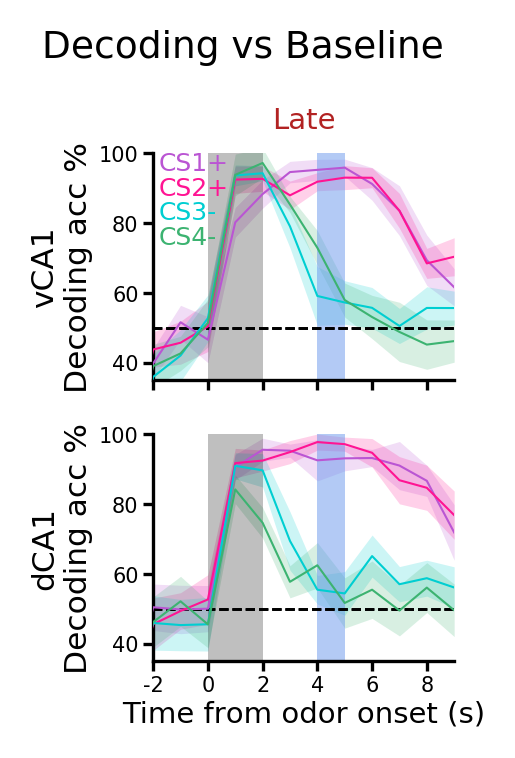

In [34]:
fig, ax = pl.subplots(2,1, figsize=(1.7, 2.35),sharex=True)

for comp,c,la in zip(comparisons[:-2],comp_colors[:-2],comp_labels[:-2]):
        for x,reg in zip (range(2),['vhpc','dhpc']):
            ax[x].plot([(t-4) for t in range(14)], [(np.mean(eval("baseline_scores_tb_%s_%s_%s['post']"%(t,comp,reg)))*100) for t in range(14)],
                       color=c, ls='-',lw=.5, zorder=19 ,ms=1,label=la)
            m = np.array([(np.mean(eval("baseline_scores_tb_%s_%s_%s['post']"%(t,comp,reg)))*100) for t in range(14)])
            s = np.array([np.std(eval("baseline_scores_tb_%s_%s_%s['post']"%(t,comp,reg)))*100 for t in range(14)])
            ax[x].fill_between([(t-4) for t in range(14)],m-s,m+s,alpha=0.2,color=c,linewidth=0)
for y in range (3):
    for x,reg in zip (range(2),['vCA1','dCA1']):
        ax[x].set_ylim(35, 100)
        ax[x].set_xlim(-2, 9)
        ax[x].tick_params(axis='both',pad=1,length=2.5)
        ax[x].set_xticks(np.arange(-2,9, 2))
        ax[x].set_xticklabels(np.arange(-2,9, 2))
        ax[x].hlines(50, -3,11, color='k', lw=.6, linestyles='dashed')
        ax[1].set_xlabel('Time from odor onset (s)',labelpad=1)
        ax[x].set_ylabel(reg+'\nDecoding acc %',fontsize=7.5,labelpad=1.5)
        pt.plot_period_bar(ax[x], 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
        pt.plot_period_bar(ax[x], 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.2)
ax[0].set_title('Late', color = dark_co[2])
#ax[0].legend(bbox_to_anchor=(1.05, 0.3), loc='upper left', borderaxespad=0.)
ax[0].text(-1.8,96-1,"CS1+",fontsize=6,color=comp_colors[0])
ax[0].text(-1.8,89-1,"CS2+",fontsize=6,color=comp_colors[1])
ax[0].text(-1.8,82-1,"CS3-",fontsize=6,color=comp_colors[2])
ax[0].text(-1.8,75-1,"CS4-",fontsize=6,color=comp_colors[3])

pl.suptitle("Decoding vs Baseline", fontsize=9, y=1.05)

fig.tight_layout(pad=2)
#fig.savefig('../figures/%s_ALLcomp_ALLtbs_Late_dv.pdf'%NOTEBOOK_NAME)

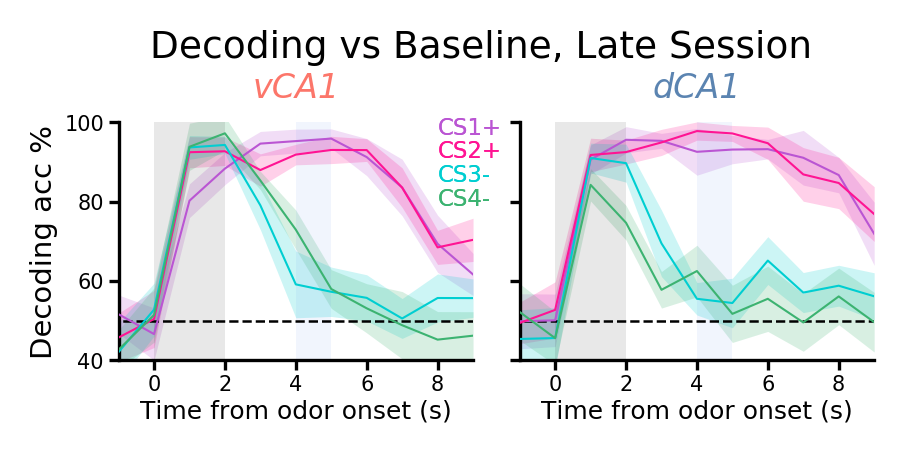

In [64]:
fig, ax = pl.subplots(1,2, figsize=(3.1, 1.45),sharey=True)

loops=10
for comp,c,la in zip(comparisons[:-2],comp_colors[:-2],comp_labels[:-2]):
        for x,reg in zip (range(2),['vhpc','dhpc']):
            ax[x].plot([(t-4) for t in range(14)], [(np.mean(eval("baseline_scores_tb_%s_%s_%s['post']"%(t,comp,reg)))*100) for t in range(14)],
                       color=c, ls='-',lw=.5, zorder=19 ,ms=1,label=la)
            m = np.array([(np.mean(eval("baseline_scores_tb_%s_%s_%s['post']"%(t,comp,reg)))*100) for t in range(14)])
            s = np.array([np.std(eval("baseline_scores_tb_%s_%s_%s['post']"%(t,comp,reg)))*100 for t in range(14)])
            ax[x].fill_between([(t-4) for t in range(14)],m-s,m+s,alpha=0.2,color=c,linewidth=0)

for x,reg,c,pos in zip (range(2),['vCA1','dCA1'],['#FC766AFF','#5B84B1FF'],[0,0.15]):
        ax[x].tick_params(axis='both',pad=1,length=2.5)
        ax[x].set_ylim(40, 100)
        ax[x].set_xlim(-1.,9)
        ax[x].set_xticks(np.arange(0,9,2))
        ax[x].set_xticklabels(np.arange(0,9,2))
        ax[x].hlines(50, -5,11, color='k', lw=.6, linestyles='dashed')
        ax[x].set_xlabel('Time from odor onset (s)',labelpad=1,fontsize=6)
        ax[0].set_ylabel('Decoding acc %',labelpad=1.5)
        pt.plot_period_bar(ax[x], 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
        pt.plot_period_bar(ax[x], 0, start_end=(4, 5), color='cornflowerblue', delta_y=100,alpha=.09)
        #ax[0].set_title('Pre-training', color=dark_co_b[0])
        #ax[1].legend(bbox_to_anchor=(.55, .9), loc='upper left', borderaxespad=0.)
        ax[x].set_title(reg,color=c,fontstyle='italic',fontsize=8)
        ax[0].text(8,97,"CS1+",fontsize=5.5,color=comp_colors[0])
        ax[0].text(8,91,"CS2+",fontsize=5.5,color=comp_colors[1])
        ax[0].text(8,85,"CS3-",fontsize=5.5,color=comp_colors[2])
        ax[0].text(8,79,"CS4-",fontsize=5.5,color=comp_colors[3])
pl.suptitle("Decoding vs Baseline, Late Session", fontsize=9, y=1,x=.53)

fig.tight_layout(pad=2)
fig.savefig('../figures/%s_ALLcomp_ALLtbs_Late_dv.pdf'%NOTEBOOK_NAME)

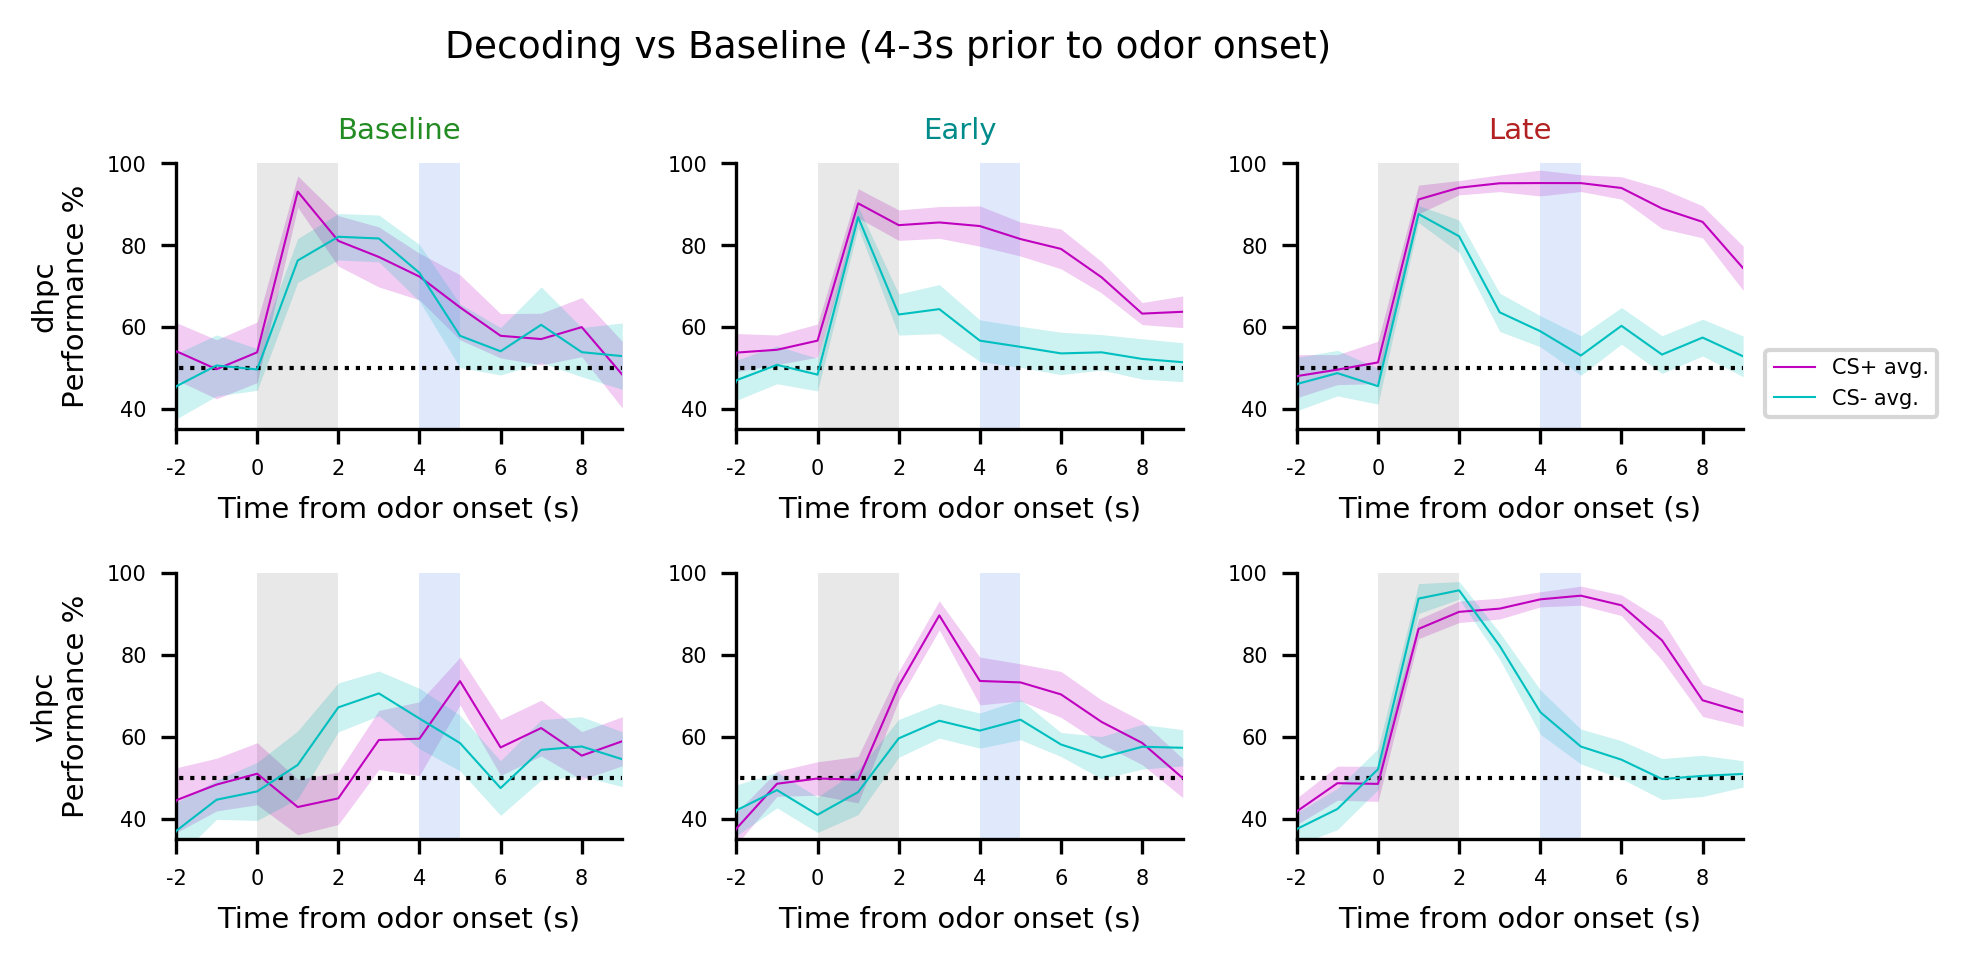

In [18]:
fig, ax = pl.subplots(2,3, figsize=(6, 3))

for comp,c,la in zip(comparisons[-2:],comp_colors[-2:],comp_labels[-2:]):
    for y,sess in zip(range(3),sessions):
        for x,reg in zip (range(2),['dhpc','vhpc']):
            ax[x][y].plot([(t-4) for t in range(14)], [(np.mean(eval("baseline_scores_tb_%s_%s_%s[sess]"%(t,comp,reg)))*100) for t in range(14)],
                       color=c, ls='-',lw=.5, zorder=19 ,ms=1,label=la)
            m = np.array([(np.mean(eval("baseline_scores_tb_%s_%s_%s[sess]"%(t,comp,reg)))*100) for t in range(14)])
            s = np.array([np.std(eval("baseline_scores_tb_%s_%s_%s[sess]"%(t,comp,reg)))*100 for t in range(14)])
            ax[x][y].fill_between([(t-4) for t in range(14)],m-s,m+s,alpha=0.2,color=c,linewidth=0)
for y in range (3):
    for x,reg in zip (range(2),['dhpc','vhpc']):
        ax[x][y].set_ylim(35, 100)
        ax[x][y].set_xlim(-2, 9)
        ax[x][y].set_xticks(np.arange(-2,9, 2))
        ax[x][y].set_xticklabels(np.arange(-2,9, 2))
        ax[x][y].hlines(50, -3,11, color='k', lw=1, linestyles='dotted')
        ax[x][y].set_xlabel('Time from odor onset (s)')
        ax[x][0].set_ylabel('%s'%reg + '\nPerformance %')
        pt.plot_period_bar(ax[x][y], 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
        pt.plot_period_bar(ax[x][y], 0, start_end=(4, 5), color='cornflowerblue', delta_y=100, alpha=.2)
ax[0][0].set_title('Baseline', color=dark_co[0])
ax[0][1].set_title('Early', color = dark_co[1])
ax[0][2].set_title('Late', color = dark_co[2])
ax[0][2].legend(bbox_to_anchor=(1.05, 0.3), loc='upper left', borderaxespad=0.)
pl.suptitle("Decoding vs Baseline (4-3s prior to odor onset)", fontsize=9, y=1.05)

fig.tight_layout(pad=2)
fig.savefig('../figures/%s_ALLcomp_ALLtbs_ALLsess_avg_dv.pdf'%NOTEBOOK_NAME)

### plot dhpc and vhpc on same plot. CS, Tr and US plots

In [20]:
#mmc = multiple-comparisons correction (using bonferroni), where mcc = number of comparisons))

from matplotlib.lines import Line2D
def add_significance(ax, array1, array2, x1, x2, y, ticksize=0.02, sig_func=None, thresholds=(0.05, 0.01, 0.001),mcc=1):
    if sig_func is None:
        sig_func = lambda x, y: sstats.mannwhitneyu(x, y, alternative='two-sided')
    p = sig_func(array1, array2)[-1]
    sig_value = sig_func(array1, array2)[0]
    deltay = np.diff(ax.axis()[-2:])*ticksize
    line = Line2D([x1, x1, x2, x2], [y-deltay, y, y, y-deltay], lw=.5, color='k', clip_on=False)
    ax.add_line(line)
    ax.text(np.mean([x1, x2]), y+1,
            'n.s.' if p > thresholds[0]/mcc else
            '*' if p > thresholds[1]/mcc else
            '**' if p > thresholds[2]/mcc else
            '***',
            ha='center', fontsize=4)
    return sig_value, p

In [21]:
def sig_vs_chance(ax, array1, chance, x1, y1, loops=loops, ticksize=0.02, sig_func=None, thresholds=(0.05, 0.01, 0.001),colors='k'):
    if sig_func is None:
        sig_func = lambda x: sstats.wilcoxon(x)
        subtracted = [x-chance for x in array1]
        p = sig_func(subtracted)[-1]
        sig_value = sig_func(subtracted)[0]
    elif sig_func is ttest:
        sig_func = lambda x, y: sstats.ttest_1samp(x,y)
        p = sig_func(array1,chance)[-1]
        sig_value = sig_func(array1,chance)[0]
    ax.text(x1, y1,
            'n.s.' if p>thresholds[0] else
            '*' if p>thresholds[1] else
            '**' if p>thresholds[2] else
            '***',
            ha='center', fontsize=4, color=colors)
    return sig_value, p

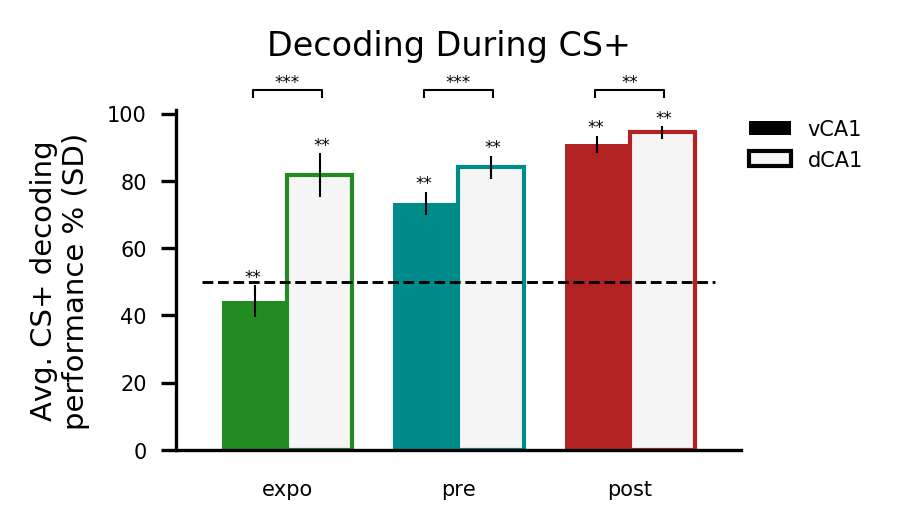

In [22]:
from matplotlib.patches import Patch
labels = sessions
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
fig, ax = pl.subplots()
for sess,c,i in zip(sessions,dark_co,range(len(sessions))):
    for comp in ['CSP_averaged']:
        v[sess] = np.array(np.std(eval("baseline_scores_tb_6_%s_vhpc"%(comp))[sess][:loops])*100)
        ax.bar(i - width/2, np.mean(eval("baseline_scores_tb_6_%s_vhpc"%(comp))[sess][:loops])*100, width, color=c,yerr=v[sess])
        d[sess] = np.array(np.std(eval("baseline_scores_tb_6_%s_dhpc"%(comp))[sess][:loops])*100)
        ax.bar(i + width/2,  np.mean(eval("baseline_scores_tb_6_%s_dhpc"%(comp))[sess][:loops])*100, width,color='whitesmoke', edgecolor=c,yerr=d[sess])
ax.hlines(50,-.5,2.5, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Avg. CS+ decoding\nperformance % (SD)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for sess,i in zip(sessions, range(len(sessions))):
    pvs.append(add_significance(ax, eval("baseline_scores_tb_6_%s_vhpc"%(comp))[sess][:loops], eval("baseline_scores_tb_6_%s_dhpc"%(comp))[sess][:loops],
        -.2+i,0.2+i,107))
    pvs.append(sig_vs_chance(ax,eval("baseline_scores_tb_6_%s_vhpc"%(comp))[sess][:loops],.5,-.2+i,
               np.mean(eval("baseline_scores_tb_6_%s_vhpc"%(comp))[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    pvs.append(sig_vs_chance(ax,eval("baseline_scores_tb_6_%s_dhpc"%(comp))[sess][:loops],.5, .2+i,
               np.mean(eval("baseline_scores_tb_6_%s_dhpc"%(comp))[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Decoding During CS+',y=1.06,fontsize=8)

#fig.savefig('../img/%s_gmin_bars_CS_all.pdf'%NOTEBOOK_NAME)

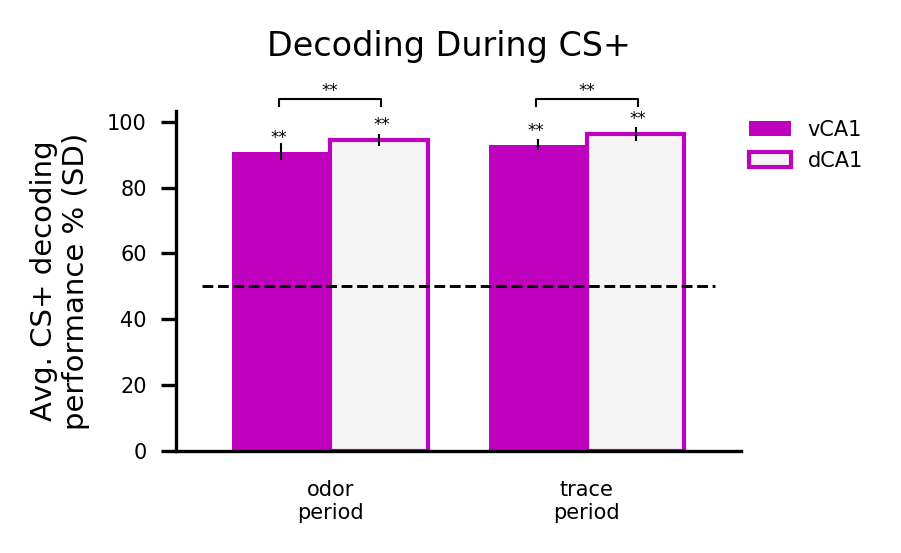

In [23]:
from matplotlib.patches import Patch
labels = ['odor\nperiod','trace\nperiod']
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
fig, ax = pl.subplots()
for t,i in zip([6,8],range(2)):
    for comp in ['CSP_averaged']:
        v['post'] = np.array(np.std(eval("baseline_scores_tb_%s_%s_vhpc"%(t,comp))['post'][:loops])*100)
        ax.bar(i - width/2, np.mean(eval("baseline_scores_tb_%s_%s_vhpc"%(t,comp))['post'][:loops])*100, width, color='m',yerr=v['post'])
        d['post'] = np.array(np.std(eval("baseline_scores_tb_%s_%s_dhpc"%(t,comp))['post'][:loops])*100)
        ax.bar(i + width/2,  np.mean(eval("baseline_scores_tb_%s_%s_dhpc"%(t,comp))['post'][:loops])*100, width,color='whitesmoke', edgecolor='m',yerr=d['post'])
ax.hlines(50,-.5,1.5, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Avg. CS+ decoding\nperformance % (SD)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='m'),Patch(facecolor='whitesmoke',edgecolor='m')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for t,i in zip([6,8],range(2)):
    for comp in ['CSP_averaged']:
        pvs.append(add_significance(ax, eval("baseline_scores_tb_%s_%s_vhpc"%(t,comp))['post'][:loops], eval("baseline_scores_tb_%s_%s_dhpc"%(t,comp))['post'][:loops],
            -.2+i,0.2+i,107))
        pvs.append(sig_vs_chance(ax,eval("baseline_scores_tb_%s_%s_vhpc"%(t,comp))['post'][:loops],.5,-.2+i,
                   np.mean(eval("baseline_scores_tb_%s_%s_vhpc"%(t,comp))['post'][:loops])*100+v['post']+1,loops=loops,sig_func=None,colors='k'))
        pvs.append(sig_vs_chance(ax,eval("baseline_scores_tb_%s_%s_dhpc"%(t,comp))['post'][:loops],.5, .2+i,
                   np.mean(eval("baseline_scores_tb_%s_%s_dhpc"%(t,comp))['post'][:loops])*100+d['post']+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Decoding During CS+',y=1.06,fontsize=8)

#fig.savefig('../img/%s_gmin_bars_CS_all.pdf'%NOTEBOOK_NAME)

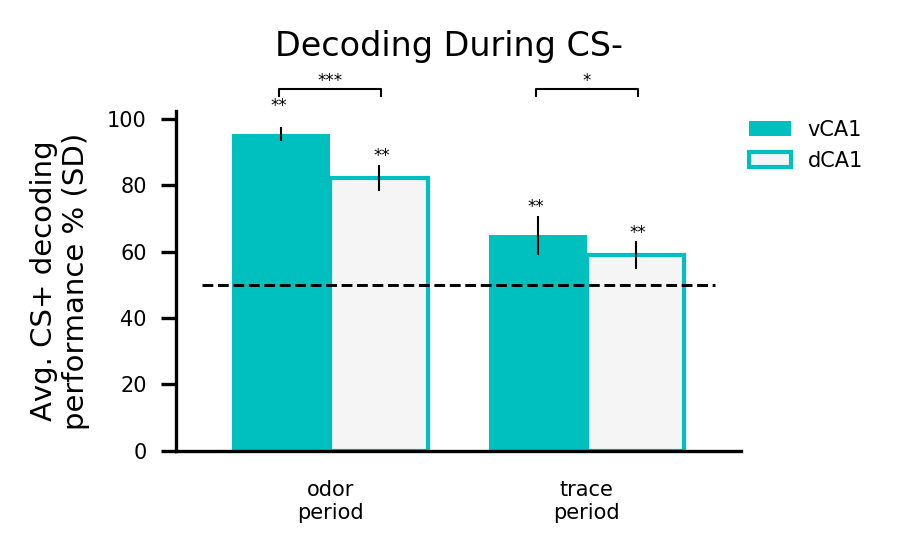

In [24]:
from matplotlib.patches import Patch
labels = ['odor\nperiod','trace\nperiod']
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
fig, ax = pl.subplots()
for t,i in zip([6,8],range(2)):
    for comp in ['CSM_averaged']:
        v['post'] = np.array(np.std(eval("baseline_scores_tb_%s_%s_vhpc"%(t,comp))['post'][:loops])*100)
        ax.bar(i - width/2, np.mean(eval("baseline_scores_tb_%s_%s_vhpc"%(t,comp))['post'][:loops])*100, width, color='c',yerr=v['post'])
        d['post'] = np.array(np.std(eval("baseline_scores_tb_%s_%s_dhpc"%(t,comp))['post'][:loops])*100)
        ax.bar(i + width/2,  np.mean(eval("baseline_scores_tb_%s_%s_dhpc"%(t,comp))['post'][:loops])*100, width,color='whitesmoke', edgecolor='c',yerr=d['post'])
ax.hlines(50,-.5,1.5, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Avg. CS+ decoding\nperformance % (SD)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='c'),Patch(facecolor='whitesmoke',edgecolor='c')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for t,i in zip([6,8],range(2)):
    for comp in ['CSM_averaged']:
        pvs.append(add_significance(ax, eval("baseline_scores_tb_%s_%s_vhpc"%(t,comp))['post'][:loops], eval("baseline_scores_tb_%s_%s_dhpc"%(t,comp))['post'][:loops],
            -.2+i,0.2+i,109))
        pvs.append(sig_vs_chance(ax,eval("baseline_scores_tb_%s_%s_vhpc"%(t,comp))['post'][:loops],.5,-.2+i,
                   np.mean(eval("baseline_scores_tb_%s_%s_vhpc"%(t,comp))['post'][:loops])*100+v['post']+1,loops=loops,sig_func=None,colors='k'))
        pvs.append(sig_vs_chance(ax,eval("baseline_scores_tb_%s_%s_dhpc"%(t,comp))['post'][:loops],.5, .2+i,
                   np.mean(eval("baseline_scores_tb_%s_%s_dhpc"%(t,comp))['post'][:loops])*100+d['post']+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Decoding During CS-',y=1.06,fontsize=8)

#fig.savefig('../img/%s_gmin_bars_CS_all.pdf'%NOTEBOOK_NAME)

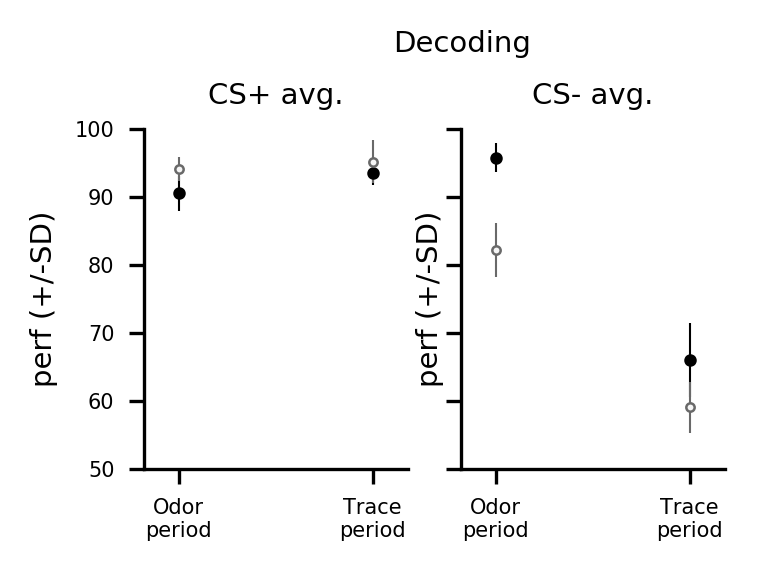

In [25]:
fig,ax = pl.subplots(1,2,figsize=(2.5,1.5),sharex=True,sharey=True)
v={}
d={}
loops=10

# Add connecting lines            
#for comp,c,z in zip(comparisons[-2:],comp_labels[-2:],(.2,1.3)):
    #for tb,tb_la,x in zip((6,8,10),('CS','Trace','US',),(range(3))):
#            ax[x].plot([p for p in (.2,1.3)],
#                       [(np.mean(eval("baseline_scores_tb_%s_%s_vhpc[:loops]"%(tb,co)))*100) for co in comparisons[-2:]],color='k')
#            ax[x].plot([p for p in (.2,1.3)],
#                       [(np.mean(eval("baseline_scores_tb_%s_%s_dhpc[:loops]"%(tb,co)))*100) for co in comparisons[-2:]],color='dimgrey',linestyle='dotted')
            
for comp,c,comp_la,z in zip(comparisons[-2:],comp_colors[-2:],comp_labels[-2:],range(2)):
    for tb,tb_la,x in zip((6,8,10),('CS','Trace'),(.2,1.3)):
            ax[z].plot(x, (np.mean(eval("baseline_scores_tb_%s_%s_vhpc['post']"%(tb,comp)))*100), 'o', color='k',markersize=2)
            ax[z].errorbar(x, (np.mean(eval("baseline_scores_tb_%s_%s_vhpc['post']"%(tb,comp)))*100),
                           yerr=np.array(np.std(eval("baseline_scores_tb_%s_%s_vhpc['post']"%(tb,comp)))*100),color='k')  
            ax[z].plot(x, (np.mean(eval("baseline_scores_tb_%s_%s_dhpc['post']"%(tb,comp)))*100), 'o', color='whitesmoke',markersize=2,mec='dimgrey',mew=.6)
            ax[z].errorbar(x, (np.mean(eval("baseline_scores_tb_%s_%s_dhpc['post']"%(tb,comp)))*100),
                           yerr=np.array(np.std(eval("baseline_scores_tb_%s_%s_dhpc['post']"%(tb,comp)))*100),color='dimgrey')

           #ax[z].tick_params(axis='x',bottom=False,labelbottom=False) # labels along the bottom edge are off
            ax[z].set_ylabel('perf (+/-SD)')
            ax[z].set_ylim(50,100)
            #ax[z].hlines(50, -.5,2.5, color='k', lw=1, linestyles='dotted')
            ax[z].set_title(comp_la,y=1)
            ax[z].set_xlim(0,1.5)
            ax[z].set_xticks((.2,1.3))
            ax[z].set_xticklabels(['Odor\nperiod','Trace\nperiod'])
            
#ax[0].legend(loc=(1,0))
pl.suptitle('Decoding',fontsize=7,x=.55,y=1.1)

##I think something is wrong below
#pvs=[]
#for tb,tb_la,x in zip((6,8,10),('CS','Trace','US'),(range(3))):
#    for ex,z in zip(expectations,(.2,1.3,)):
#        pvs.append(add_significance(ax[x], eval("baseline_scores_tb_%s_vhpc[ex[0]][:loops]+\
#                    baseline_scores_tb_%s_vhpc[ex[1]][:loops]"%(tb,tb)),
#                    eval("baseline_scores_tb_%s_dhpc[ex[0]][:loops]+\
#                        baseline_scores_tb_%s_dhpc[ex[1]][:loops]"%(tb,tb)),z,z,
#                    max((np.mean(eval("baseline_scores_tb_%s_vhpc[ex[0]][:loops]+\
#                        baseline_scores_tb_%s_vhpc[ex[1]][:loops]"%(tb,tb)))*100)+v[ex[0]+tb_la],
#                    (np.mean(eval("baseline_scores_tb_%s_dhpc[ex[0]][:loops]+\
#                        baseline_scores_tb_%s_dhpc[ex[1]][:loops]"%(tb,tb)))*100)+d[ex[0]+tb_la])+2,
#                    ticksize=0))
##        for d in range(3):
##            pvs.append(sig_vs_chance(ax[x],eval("baseline_scores_tb_%s_%s_%s['renew'][:loops]"%(tb,phases[d],r)),.5,d,
##                   eval("np.mean(baseline_scores_tb_%s_%s_%s['renew'][:loops])"%(tb,phases[d],r))*100+s[phases[d]+r]+1,loops=loops,colors='k'))
##        #       eval("baseline_scores_tb_%s_%s_%s['pre'][:loops]"%(tb,phases[i],r))*100+s+1,loops=loops,sig_func=None,colors='k'))
#    #pvs.append(sig_vs_chance(ax,baseline_scores_tb_10_dhpc[sess][:loops],.5, .2+i,
#    #           np.mean(baseline_scores_tb_10_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
#
#fig.tight_layout(pad=3)
#
##fig.savefig('../final-ish figures/%s_gmin_expectation_encoding.pdf'%NOTEBOOK_NAME)

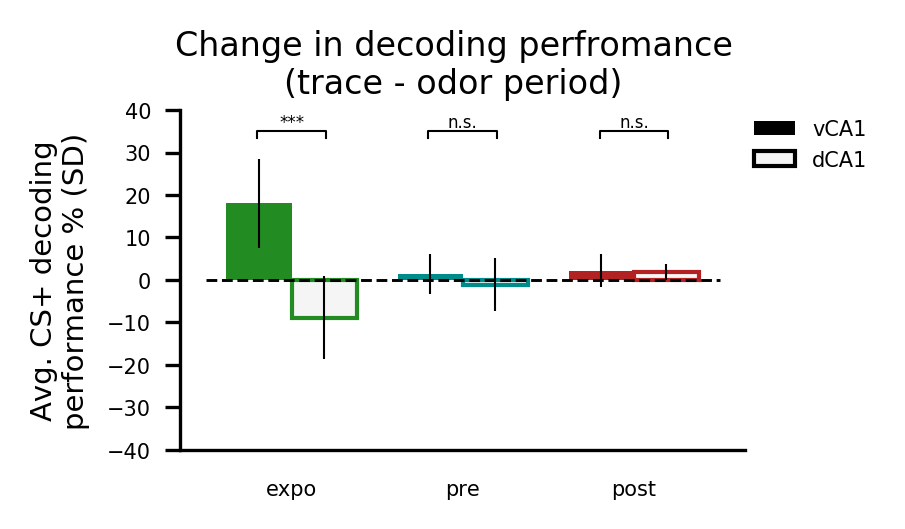

In [26]:
from matplotlib.patches import Patch
labels = sessions
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
fig, ax = pl.subplots()
for sess,c,i in zip(sessions,dark_co,range(len(sessions))):
    for comp in ['CSP_averaged']:
        v[sess] = np.array(np.std(eval("baseline_scores_tb_8_%s_vhpc"%(comp))[sess][:loops]-eval("baseline_scores_tb_6_%s_vhpc"%(comp))[sess][:loops])*100)
        ax.bar(i - width/2, np.mean(eval("baseline_scores_tb_8_%s_vhpc"%(comp))[sess][:loops]-eval("baseline_scores_tb_6_%s_vhpc"%(comp))[sess][:loops])*100, width, color=c,yerr=v[sess])
        d[sess] = np.array(np.std(eval("baseline_scores_tb_8_%s_dhpc"%(comp))[sess][:loops]-eval("baseline_scores_tb_6_%s_dhpc"%(comp))[sess][:loops])*100)
        ax.bar(i + width/2,  np.mean(eval("baseline_scores_tb_8_%s_dhpc"%(comp))[sess][:loops]-eval("baseline_scores_tb_6_%s_dhpc"%(comp))[sess][:loops])*100, width,color='whitesmoke', edgecolor=c,yerr=d[sess])
ax.hlines(0,-.5,2.5, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Avg. CS+ decoding\nperformance % (SD)')
ax.set_ylim(-40,40)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for sess,i in zip(sessions, range(len(sessions))):
    pvs.append(add_significance(ax, eval("baseline_scores_tb_8_%s_vhpc"%(comp))[sess][:loops]-eval("baseline_scores_tb_6_%s_vhpc"%(comp))[sess][:loops],
                                eval("baseline_scores_tb_8_%s_dhpc"%(comp))[sess][:loops]-eval("baseline_scores_tb_6_%s_dhpc"%(comp))[sess][:loops],
                                -.2+i,0.2+i,35))
#    pvs.append(sig_vs_chance(ax,eval("baseline_scores_tb_8_%s_vhpc"%(comp))[sess][:loops]-eval("baseline_scores_tb_6_%s_vhpc"%(comp))[sess][:loops],.5,-.2+i,
#               np.mean(eval("baseline_scores_tb_8_%s_vhpc"%(comp))[sess][:loops]-eval("baseline_scores_tb_6_%s_vhpc"%(comp))[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
#    pvs.append(sig_vs_chance(ax,eval("baseline_scores_tb_8_%s_dhpc"%(comp))[sess][:loops]-eval("baseline_scores_tb_6_%s_dhpc"%(comp))[sess][:loops],.5,+.2+i,
#               np.mean(eval("baseline_scores_tb_8_%s_dhpc"%(comp))[sess][:loops]-eval("baseline_scores_tb_6_%s_dhpc"%(comp))[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Change in decoding perfromance\n(trace - odor period)',y=1.06,fontsize=8)

#fig.savefig('../img/%s_gmin_bars_CS_all.pdf'%NOTEBOOK_NAME)

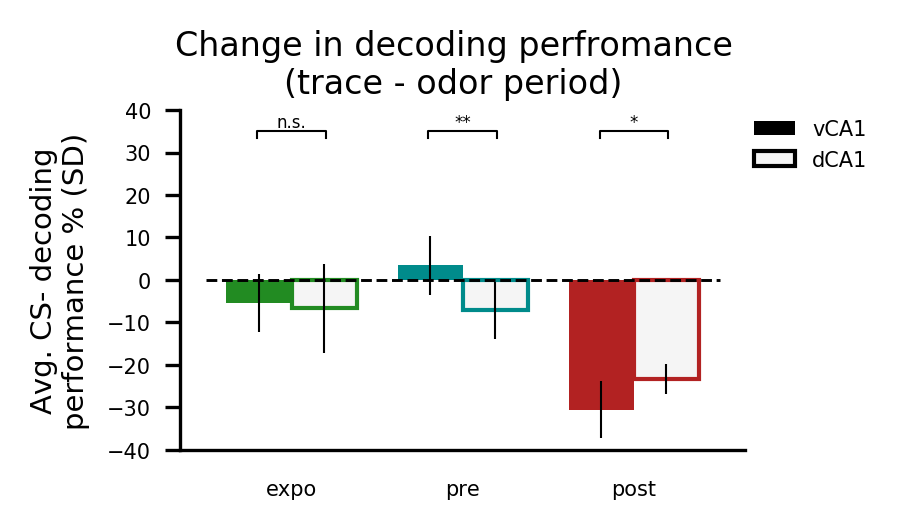

In [27]:
from matplotlib.patches import Patch
labels = sessions
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
v={}
d={}
fig, ax = pl.subplots()
for sess,c,i in zip(sessions,dark_co,range(len(sessions))):
    for comp in ['CSM_averaged']:
        v[sess] = np.array(np.std(eval("baseline_scores_tb_8_%s_vhpc"%(comp))[sess][:loops]-eval("baseline_scores_tb_6_%s_vhpc"%(comp))[sess][:loops])*100)
        ax.bar(i - width/2, np.mean(eval("baseline_scores_tb_8_%s_vhpc"%(comp))[sess][:loops]-eval("baseline_scores_tb_6_%s_vhpc"%(comp))[sess][:loops])*100, width, color=c,yerr=v[sess])
        d[sess] = np.array(np.std(eval("baseline_scores_tb_8_%s_dhpc"%(comp))[sess][:loops]-eval("baseline_scores_tb_6_%s_dhpc"%(comp))[sess][:loops])*100)
        ax.bar(i + width/2,  np.mean(eval("baseline_scores_tb_8_%s_dhpc"%(comp))[sess][:loops]-eval("baseline_scores_tb_6_%s_dhpc"%(comp))[sess][:loops])*100, width,color='whitesmoke', edgecolor=c,yerr=d[sess])
ax.hlines(0,-.5,2.5, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Avg. CS- decoding\nperformance % (SD)')
ax.set_ylim(-40,40)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for sess,i in zip(sessions, range(len(sessions))):
    pvs.append(add_significance(ax, eval("baseline_scores_tb_8_%s_vhpc"%(comp))[sess][:loops]-eval("baseline_scores_tb_6_%s_vhpc"%(comp))[sess][:loops],
                                eval("baseline_scores_tb_8_%s_dhpc"%(comp))[sess][:loops]-eval("baseline_scores_tb_6_%s_dhpc"%(comp))[sess][:loops],
                                -.2+i,0.2+i,35))
#    pvs.append(sig_vs_chance(ax,eval("baseline_scores_tb_8_%s_vhpc"%(comp))[sess][:loops]-eval("baseline_scores_tb_6_%s_vhpc"%(comp))[sess][:loops],.5,-.2+i,
#               np.mean(eval("baseline_scores_tb_8_%s_vhpc"%(comp))[sess][:loops]-eval("baseline_scores_tb_6_%s_vhpc"%(comp))[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
#    pvs.append(sig_vs_chance(ax,eval("baseline_scores_tb_8_%s_dhpc"%(comp))[sess][:loops]-eval("baseline_scores_tb_6_%s_dhpc"%(comp))[sess][:loops],.5,+.2+i,
#               np.mean(eval("baseline_scores_tb_8_%s_dhpc"%(comp))[sess][:loops]-eval("baseline_scores_tb_6_%s_dhpc"%(comp))[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Change in decoding perfromance\n(trace - odor period)',y=1.06,fontsize=8)

#fig.savefig('../img/%s_gmin_bars_CS_all.pdf'%NOTEBOOK_NAME)

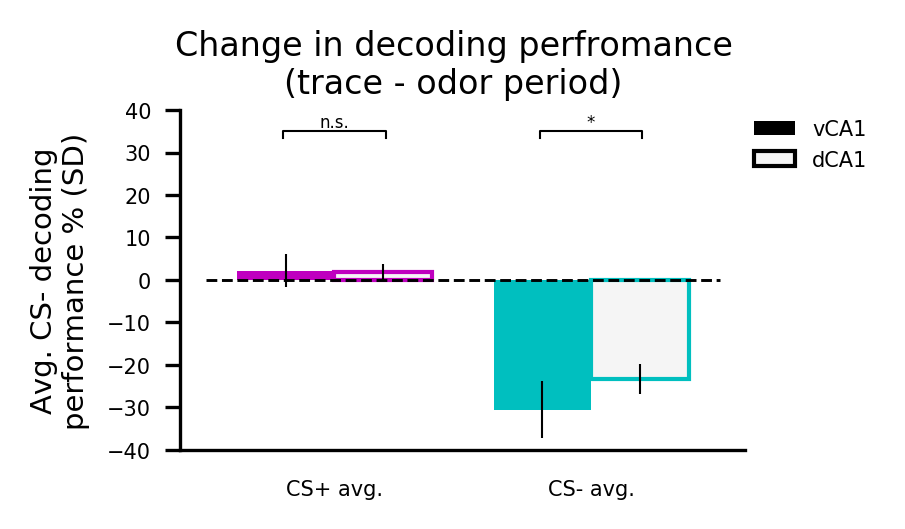

In [28]:
from matplotlib.patches import Patch
labels = [comp_labels[-2],comp_labels[-1]]
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
i=1
v={}
d={}
fig, ax = pl.subplots()
for comp,i,c in zip(comparisons[-2:],range(2), comp_colors[-2:]):
        v['post'] = np.array(np.std(eval("baseline_scores_tb_8_%s_vhpc"%(comp))['post'][:loops]-eval("baseline_scores_tb_6_%s_vhpc"%(comp))['post'][:loops])*100)
        ax.bar(i - width/2, np.mean(eval("baseline_scores_tb_8_%s_vhpc"%(comp))['post'][:loops]-eval("baseline_scores_tb_6_%s_vhpc"%(comp))['post'][:loops])*100, width, color=c,yerr=v['post'])
        d['post'] = np.array(np.std(eval("baseline_scores_tb_8_%s_dhpc"%(comp))['post'][:loops]-eval("baseline_scores_tb_6_%s_dhpc"%(comp))['post'][:loops])*100)
        ax.bar(i + width/2,  np.mean(eval("baseline_scores_tb_8_%s_dhpc"%(comp))['post'][:loops]-eval("baseline_scores_tb_6_%s_dhpc"%(comp))['post'][:loops])*100, width,color='whitesmoke', edgecolor=c,yerr=d['post'])
ax.hlines(0,-.5,1.5, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Avg. CS- decoding\nperformance % (SD)')
ax.set_ylim(-40,40)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for comp,i,c in zip(comparisons[-2:],range(2), comp_colors[-2:]):
    pvs.append(add_significance(ax, eval("baseline_scores_tb_8_%s_vhpc"%(comp))['post'][:loops]-eval("baseline_scores_tb_6_%s_vhpc"%(comp))['post'][:loops],
                                eval("baseline_scores_tb_8_%s_dhpc"%(comp))['post'][:loops]-eval("baseline_scores_tb_6_%s_dhpc"%(comp))['post'][:loops],
                                -.2+i,0.2+i,35))
#    pvs.append(sig_vs_chance(ax,eval("baseline_scores_tb_8_%s_vhpc"%(comp))['post'][:loops]-eval("baseline_scores_tb_6_%s_vhpc"%(comp))['post'][:loops],.5,-.2+i,
#               np.mean(eval("baseline_scores_tb_8_%s_vhpc"%(comp))['post'][:loops]-eval("baseline_scores_tb_6_%s_vhpc"%(comp))['post'][:loops])*100+v['post']+1,loops=loops,sig_func=None,colors='k'))
#    pvs.append(sig_vs_chance(ax,eval("baseline_scores_tb_8_%s_dhpc"%(comp))['post'][:loops]-eval("baseline_scores_tb_6_%s_dhpc"%(comp))['post'][:loops],.5,+.2+i,
#               np.mean(eval("baseline_scores_tb_8_%s_dhpc"%(comp))['post'][:loops]-eval("baseline_scores_tb_6_%s_dhpc"%(comp))['post'][:loops])*100+v['post']+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Change in decoding perfromance\n(trace - odor period)',y=1.06,fontsize=8)

#fig.savefig('../img/%s_gmin_bars_CS_all.pdf'%NOTEBOOK_NAME)

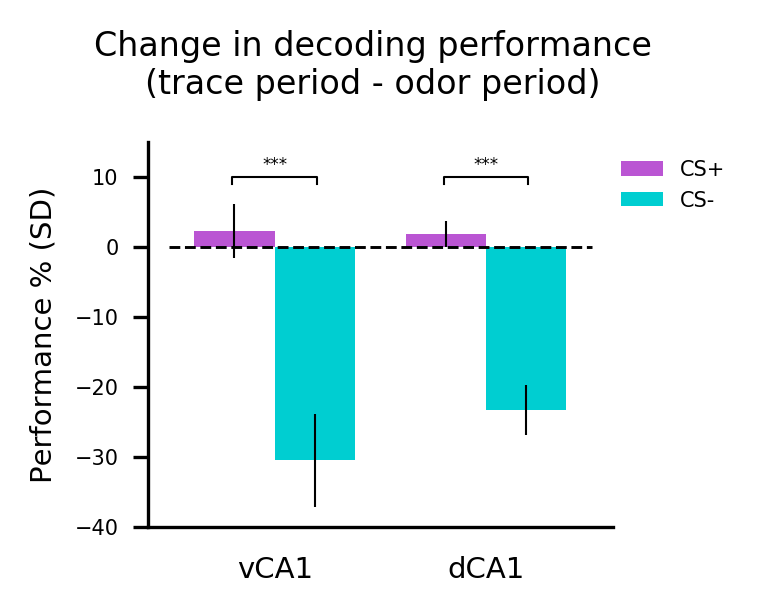

In [39]:
from matplotlib.patches import Patch
labels = [comp_labels[-2],comp_labels[-1]]
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
loops=10
i=1
v={}
d={}
fig, ax = pl.subplots(figsize=(2,1.7))

v['post'] = np.array(np.std(baseline_scores_tb_8_CSP_averaged_vhpc['post'][:loops]-baseline_scores_tb_6_CSP_averaged_vhpc['post'][:loops])*100)
ax.bar(0 - width/2, np.mean(baseline_scores_tb_8_CSP_averaged_vhpc['post'][:loops]-baseline_scores_tb_6_CSP_averaged_vhpc['post'][:loops])*100,
       width, color='mediumorchid',yerr=v['post'])
d['post'] = np.array(np.std(baseline_scores_tb_8_CSM_averaged_vhpc['post'][:loops]-baseline_scores_tb_6_CSM_averaged_vhpc['post'][:loops])*100)
ax.bar(0 + width/2,  np.mean(baseline_scores_tb_8_CSM_averaged_vhpc['post'][:loops]-baseline_scores_tb_6_CSM_averaged_vhpc['post'][:loops])*100,
       width,color='darkturquoise',yerr=d['post'])

v['post'] = np.array(np.std(baseline_scores_tb_8_CSP_averaged_dhpc['post'][:loops]-baseline_scores_tb_6_CSP_averaged_dhpc['post'][:loops])*100)
ax.bar(1 - width/2, np.mean(baseline_scores_tb_8_CSP_averaged_dhpc['post'][:loops]-baseline_scores_tb_6_CSP_averaged_dhpc['post'][:loops])*100, 
       width, color='mediumorchid',yerr=v['post'])
d['post'] = np.array(np.std(baseline_scores_tb_8_CSM_averaged_dhpc['post'][:loops]-baseline_scores_tb_6_CSM_averaged_dhpc['post'][:loops])*100)
ax.bar(1 + width/2,  np.mean(baseline_scores_tb_8_CSM_averaged_dhpc['post'][:loops]-baseline_scores_tb_6_CSM_averaged_dhpc['post'][:loops])*100,
       width, color='darkturquoise',yerr=d['post'])

ax.hlines(0,-.5,1.5, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Performance % (SD)')
ax.set_ylim(-40,15)
ax.set_xticks(x)
ax.set_xticklabels(['vCA1','dCA1'],fontsize=7)
ax.legend([Patch(facecolor='mediumorchid'),Patch(facecolor='darkturquoise')],['CS+','CS-'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for reg,i,c in zip(['vhpc','dhpc'],range(2), comp_colors[-2:]):
    pvs.append(add_significance(ax, eval("baseline_scores_tb_8_CSP_averaged_%s"%(reg))['post'][:loops]-eval("baseline_scores_tb_6_CSP_averaged_%s"%(reg))['post'][:loops],
                                eval("baseline_scores_tb_8_CSM_averaged_%s"%(reg))['post'][:loops]-eval("baseline_scores_tb_6_CSM_averaged_%s"%(reg))['post'][:loops],
                                -.2+i,0.2+i,10))
#    pvs.append(sig_vs_chance(ax,eval("baseline_scores_tb_8_%s_vhpc"%(comp))['post'][:loops]-eval("baseline_scores_tb_6_%s_vhpc"%(comp))['post'][:loops],.5,-.2+i,
#               np.mean(eval("baseline_scores_tb_8_%s_vhpc"%(comp))['post'][:loops]-eval("baseline_scores_tb_6_%s_vhpc"%(comp))['post'][:loops])*100+v['post']+1,loops=loops,sig_func=None,colors='k'))
#    pvs.append(sig_vs_chance(ax,eval("baseline_scores_tb_8_%s_dhpc"%(comp))['post'][:loops]-eval("baseline_scores_tb_6_%s_dhpc"%(comp))['post'][:loops],.5,+.2+i,
#               np.mean(eval("baseline_scores_tb_8_%s_dhpc"%(comp))['post'][:loops]-eval("baseline_scores_tb_6_%s_dhpc"%(comp))['post'][:loops])*100+v['post']+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Change in decoding performance\n(trace period - odor period)',y=1.1,fontsize=8)

fig.savefig('../figures/%s_change_in_decoding.pdf'%NOTEBOOK_NAME)

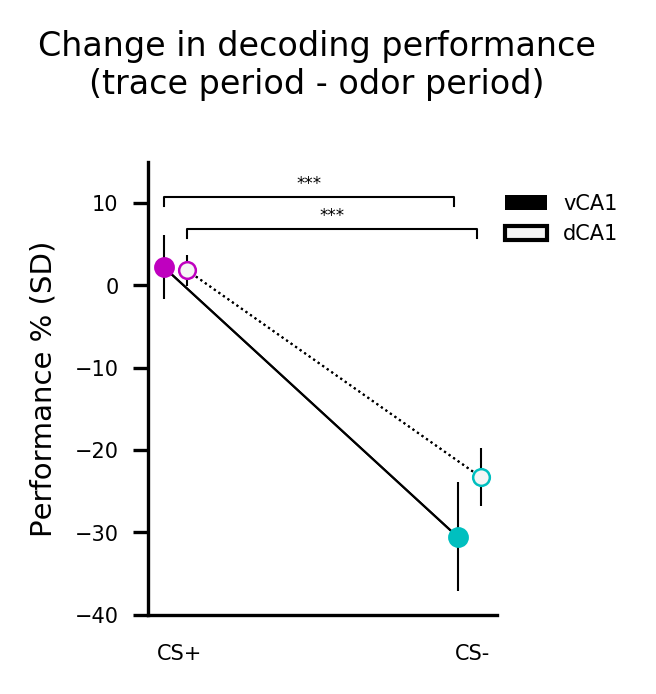

In [30]:
from matplotlib.patches import Patch
labels = [comp_labels[-2],comp_labels[-1]]
x = np.arange(2)  # the label locations
width = 0.38  # the width of the bars
loops=10
i=1
v={}
d={}
fig, ax = pl.subplots(figsize=(1.5,2))

## Add connecting lines            
for comp,c,z in zip(comparisons[-2:],comp_colors[-2:],(0 - width/2,0 + width/2)):
   #for tb,tb_la,x in zip((6,8,10),('CS','Trace','US',),(range(3))):
            ax.plot([z for z in (0 - width/2,0 + width/2)],
                    [(np.mean(eval("baseline_scores_tb_8_%s_vhpc['post'][:loops]"%(co))-eval("baseline_scores_tb_6_%s_vhpc['post'][:loops]"%(co)))*100) for co in comparisons[-2:]],
                     color='k')
            ax.plot([z for z in (0.03 - width/2,0.03 + width/2)],
                    [(np.mean(eval("baseline_scores_tb_8_%s_dhpc['post'][:loops]"%(co))-eval("baseline_scores_tb_6_%s_dhpc['post'][:loops]"%(co)))*100) for co in comparisons[-2:]],
                     color='k',linestyle='dotted')

v['post'] = np.array(np.std(baseline_scores_tb_8_CSP_averaged_vhpc['post'][:loops]-baseline_scores_tb_6_CSP_averaged_vhpc['post'][:loops])*100)
ax.plot(0 - width/2, np.mean(baseline_scores_tb_8_CSP_averaged_vhpc['post'][:loops]-baseline_scores_tb_6_CSP_averaged_vhpc['post'][:loops])*100,
       'o', color='m',markersize=4)
ax.errorbar(0 - width/2, np.mean(baseline_scores_tb_8_CSP_averaged_vhpc['post'][:loops]-baseline_scores_tb_6_CSP_averaged_vhpc['post'][:loops])*100,
       color='k',yerr=v['post'])
d['post'] = np.array(np.std(baseline_scores_tb_8_CSM_averaged_vhpc['post'][:loops]-baseline_scores_tb_6_CSM_averaged_vhpc['post'][:loops])*100)
ax.plot(0 + width/2,  np.mean(baseline_scores_tb_8_CSM_averaged_vhpc['post'][:loops]-baseline_scores_tb_6_CSM_averaged_vhpc['post'][:loops])*100,
       'o',color='c',markersize=4)
ax.errorbar(0 + width/2,  np.mean(baseline_scores_tb_8_CSM_averaged_vhpc['post'][:loops]-baseline_scores_tb_6_CSM_averaged_vhpc['post'][:loops])*100,
       color='k',yerr=d['post'])

v['post'] = np.array(np.std(baseline_scores_tb_8_CSP_averaged_dhpc['post'][:loops]-baseline_scores_tb_6_CSP_averaged_dhpc['post'][:loops])*100)
ax.plot(0.03 - width/2, np.mean(baseline_scores_tb_8_CSP_averaged_dhpc['post'][:loops]-baseline_scores_tb_6_CSP_averaged_dhpc['post'][:loops])*100, 
       'o', color='whitesmoke',markersize=4,mec='m',mew=.6)
ax.errorbar(0.03 - width/2, np.mean(baseline_scores_tb_8_CSP_averaged_dhpc['post'][:loops]-baseline_scores_tb_6_CSP_averaged_dhpc['post'][:loops])*100, 
        color='k',yerr=v['post'])
d['post'] = np.array(np.std(baseline_scores_tb_8_CSM_averaged_dhpc['post'][:loops]-baseline_scores_tb_6_CSM_averaged_dhpc['post'][:loops])*100)
ax.plot(0.03 + width/2,  np.mean(baseline_scores_tb_8_CSM_averaged_dhpc['post'][:loops]-baseline_scores_tb_6_CSM_averaged_dhpc['post'][:loops])*100,
       'o', color='whitesmoke',markersize=4,mec='c',mew=.6)
ax.errorbar(0.03 + width/2,  np.mean(baseline_scores_tb_8_CSM_averaged_dhpc['post'][:loops]-baseline_scores_tb_6_CSM_averaged_dhpc['post'][:loops])*100,
        color='k',yerr=d['post'])

#ax.hlines(0,-.5,1.5, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Performance % (SD)')
ax.set_ylim(-40,15)
ax.set_xticks([-.17,.21])
ax.set_xticklabels(['CS+','CS-'])
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['vCA1','dCA1'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for reg,i,c in zip(['vhpc','dhpc'],[0.01,0.04], comp_colors[-2:]):
    pvs.append(add_significance(ax, eval("baseline_scores_tb_8_CSP_averaged_%s"%(reg))['post'][:loops]-eval("baseline_scores_tb_6_CSP_averaged_%s"%(reg))['post'][:loops],
                                eval("baseline_scores_tb_8_CSM_averaged_%s"%(reg))['post'][:loops]-eval("baseline_scores_tb_6_CSM_averaged_%s"%(reg))['post'][:loops],
                                -.2+i,0.175+i,12-(i*130)))
#    pvs.append(sig_vs_chance(ax,eval("baseline_scores_tb_8_%s_vhpc"%(comp))['post'][:loops]-eval("baseline_scores_tb_6_%s_vhpc"%(comp))['post'][:loops],.5,-.2+i,
#               np.mean(eval("baseline_scores_tb_8_%s_vhpc"%(comp))['post'][:loops]-eval("baseline_scores_tb_6_%s_vhpc"%(comp))['post'][:loops])*100+v['post']+1,loops=loops,sig_func=None,colors='k'))
#    pvs.append(sig_vs_chance(ax,eval("baseline_scores_tb_8_%s_dhpc"%(comp))['post'][:loops]-eval("baseline_scores_tb_6_%s_dhpc"%(comp))['post'][:loops],.5,+.2+i,
#               np.mean(eval("baseline_scores_tb_8_%s_dhpc"%(comp))['post'][:loops]-eval("baseline_scores_tb_6_%s_dhpc"%(comp))['post'][:loops])*100+v['post']+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Change in decoding performance\n(trace period - odor period)',y=1.1,fontsize=8)

#fig.savefig('../img/%s_gmin_bars_CS_all.pdf'%NOTEBOOK_NAME)

In [31]:
save_workspace(db)

Could not store variable 'ip'. Skipping...
Could not store variable 'IPython'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'sstats'. Skipping...
Could not store variable 'pl'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'sys'. Skipping...
Could not store variable 'os'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'np'. Skipping...
